In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ydata_profiling import ProfileReport
import sqlite3
import statistics as st

C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('ReactionTypes.csv')

In [3]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
data

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [5]:
# shown the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 644.0+ bytes


In [6]:
# show the shape of the data
data.shape

(16, 4)

In [7]:
#show the firt lines 
data.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [8]:
#cheak for the missing values 
data.isna().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [9]:
#cheak for the duplicates
data.duplicated().sum()

0

In [10]:
#descriptive stats
data.describe()

,Unnamed: 0,Score
count,16.000000,16.000000
mean,7.500000,39.625000
std,4.760952,26.901983
min,0.000000,0.000000
25%,3.750000,14.250000
50%,7.500000,40.000000
75%,11.250000,66.250000
max,15.000000,75.000000


C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldc

<Axes: ylabel='Count'>

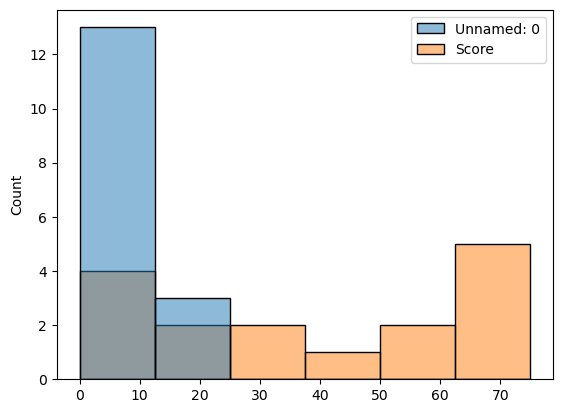

In [11]:
#the way the data is distributed in the data
sns.histplot(data)

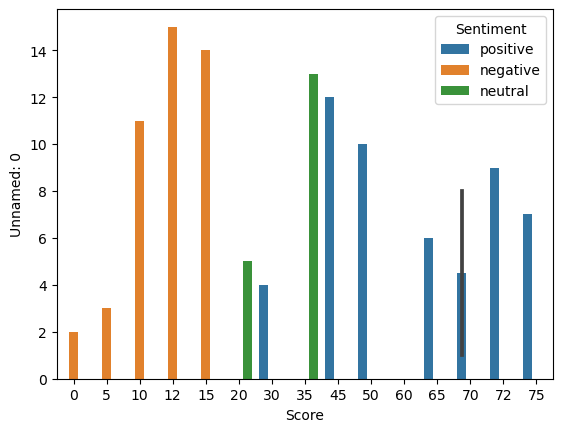

In [12]:
sns.barplot(data=data, x=data['Score'], y=data['Unnamed: 0'], hue='Sentiment');

In [13]:
#the 'Reaction' dataset
data1 = pd.read_csv('Reactions.csv')


In [14]:
data1

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [15]:
# shown the information of the data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [16]:
# show the shape of the data
data1.shape

(25553, 5)

In [17]:
#show the firt lines 
data1.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [18]:
#cheack for the missing values 
data1.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [19]:
#cheack for the duplicates
data1.duplicated().sum()

0

In [20]:
#descriptive stats
data1.describe()

,Unnamed: 0
count,25553.00000
mean,12776.00000
std,7376.66005
min,0.00000
25%,6388.00000
50%,12776.00000
75%,19164.00000
max,25552.00000


In [21]:
#verification of missing in the data
data1.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [22]:
#drop the lines that contains missing values
data1.dropna(axis =0, inplace=True)

In [23]:
data1.isna().sum()

Unnamed: 0    0
Content ID    0
User ID       0
Type          0
Datetime      0
dtype: int64

In [24]:
#remove columns that will not help
#data1 = data1.drop(columns=['Unnamed: 0'], inplace=True)

In [25]:
#the 'content' dataset
data2 = pd.read_csv('Content.csv')

In [26]:
data2

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


In [27]:
# shown the information of the data
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [28]:
# show the shape of the data
data2.shape

(1000, 6)

In [29]:
#cheack for the missing values 
data2.isna().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [30]:
#cheack for the duplicates
data2.duplicated().sum()

0

In [31]:
#drop the rows contening the missing values
data2.dropna(axis =0, inplace=True)

In [32]:
data2.isna().sum()

Unnamed: 0    0
Content ID    0
User ID       0
Type          0
Category      0
URL           0
dtype: int64

In [33]:
data2

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
994,994,c54b49c4-b1f2-4641-8595-1cbd19937845,2ab641a8-6ad4-4d1a-8511-d87ff5346773,photo,science,https://socialbuzz.cdn.com/content/storage/c54...
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


In [34]:
from ydata_profiling import ProfileReport

In [35]:
ProfileReport(data2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
data2['Content ID'].unique()

array(['97522e57-d9ab-4bd6-97bf-c24d952602d2',
       '9f737e0a-3cdd-4d29-9d24-753f4e3be810',
       '230c4e4d-70c3-461d-b42c-ec09396efb3f',
       '356fff80-da4d-4785-9f43-bc1261031dc6',
       '01ab84dd-6364-4236-abbb-3f237db77180',
       '3f8590c7-6ab2-4973-805a-90cdec355f05',
       'e5490118-90d5-4572-ab1c-1fbc87b8d9ca',
       '0bedca96-fb76-4287-a83c-17330ed39cce',
       'b18cb63f-4c8e-44ee-a47f-541e95191d11',
       '46fb701d-6c26-458e-ada3-2ebe5dbba01f',
       '0be59876-d70c-486c-8e0b-a06bef7a2cd6',
       '81abd65a-3b76-4574-a0a7-db6bf7184ae2',
       'e6ee2244-9382-49a9-8cbf-fa54aaaa2392',
       'f332d362-dc48-46c2-a64b-641157c0987e',
       'a2e93b29-9259-4092-a4d7-62d5e823bb74',
       '9b3a6d30-48e8-476c-82be-9031524bd04d',
       '850fe90d-47d6-4eb7-b9c8-810afcb99ce9',
       'f98dde71-ce1d-4f6c-bb05-ae05779d2207',
       '388bd9db-9d10-4f47-87c4-6db46e83bc95',
       '78d0075f-895c-4a15-a35c-a921e2bb2cea',
       'bda0b065-7f8b-4d52-b7e9-fcc375cdab08',
       '809b4

In [37]:
#remove columns that will not help
#data2 = data2.drop(columns=['Unnamed: 0'], inplace=True)

<Axes: xlabel='Category'>

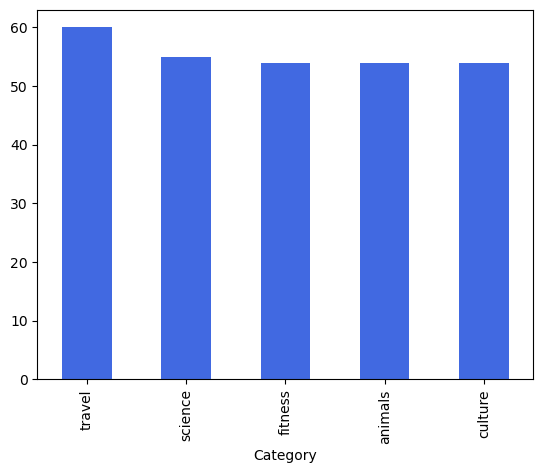

In [38]:
# the top 5 categories 
data2['Category'].value_counts().head().plot(kind='bar', color='royalblue')

In [39]:
df1 = pd.merge(data, data1, on='Unnamed: 0')

In [40]:
df = 

SyntaxError: invalid syntax (1581804619.py, line 1)

In [ ]:
df = pd.merge(df1, data2, on='Unnamed: 0')

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
# the top 5 categories 
df['Category'].value_counts().head().plot(kind='bar', color='royalblue')

In [ ]:
df.plot(kind='box')

In [ ]:
df.info()

In [ ]:
df['Datetime'].unique()

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [ ]:
df.info()

In [ ]:
# transforming the 'Content ID_x', 'User ID_x', 'Content ID_y', 'User ID_y' columns into the proper types
df['Content ID_x'].unique()

In [ ]:
df.drop(columns = ['Content ID_x', 'User ID_x', 'Content ID_y', 'User ID_y'], inplace= True)

In [ ]:
df.groupby('Category')

In [ ]:
df.groupby('Category').agg({'Score': ['sum']})

In [ ]:
df.sort_values(by='Score', ascending=False).groupby('Category').agg({'Score':['sum']}).plot(kind='bar', color='skyblue')